In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install yfinance

import yfinance as yf 

In [37]:
start = '2015-01-01'
end = '2025-12-20'
stock = 'NVDA'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [38]:
data.reset_index(inplace=True)

In [39]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA
0,2015-01-02,0.483011,0.486611,0.475333,0.483011,113680000
1,2015-01-05,0.474853,0.484451,0.472694,0.483011,197952000
2,2015-01-06,0.460457,0.476053,0.459977,0.475573,197764000
3,2015-01-07,0.459257,0.467895,0.457817,0.463816,321808000
4,2015-01-08,0.476533,0.479412,0.464296,0.464536,283780000
...,...,...,...,...,...,...
2754,2025-12-15,176.289993,178.419998,175.029999,177.940002,164775600
2755,2025-12-16,177.720001,178.490005,174.899994,176.259995,148588100
2756,2025-12-17,170.940002,176.130005,170.309998,176.100006,222775500


In [40]:
ma_100_days=data.Close.rolling(100).mean()

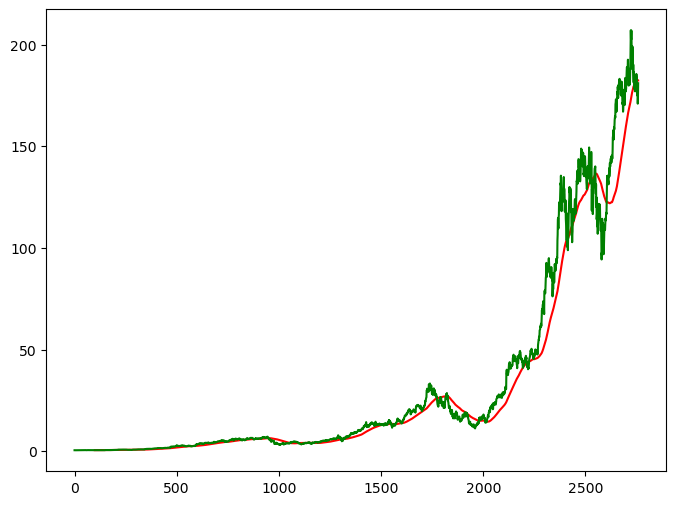

In [41]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [42]:
ma_200_days = data.Close.rolling(200).mean()

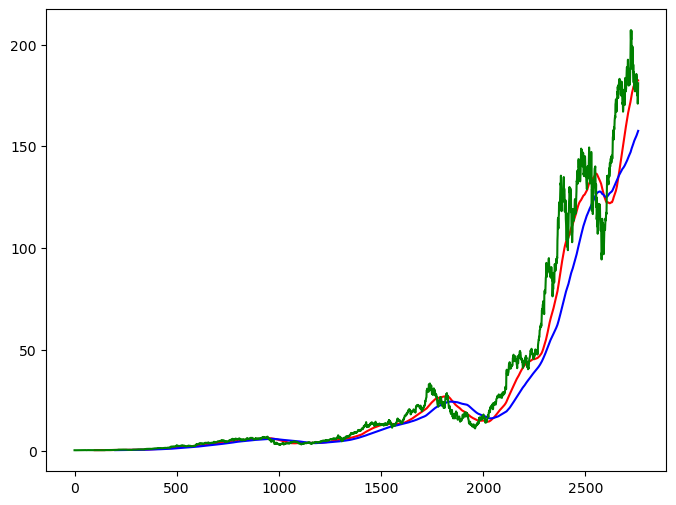

In [43]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [44]:
data.dropna(inplace=True)

In [45]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
# Create a new column named 'test' using bracket notation
data_test = pd.DataFrame(data.Close[int(len(data) * 0.8): len(data)])


In [46]:
data_train.shape[0]

2207

In [48]:
 data_test.shape[0]

552

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [50]:
data_train_scale= scaler.fit_transform(data_train)

In [51]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [52]:
x,y = np.array(x), np.array(y)

In [53]:
from keras.layers import Dense, Dropout, LSTM 
from keras.models import Sequential

In [54]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation= 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))
          

C:\Users\Taiwo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [56]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - loss: 0.0260
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - loss: 0.0056
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - loss: 0.0041
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 0.0042
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 0.0034
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.0032
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.0036
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.0035
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - loss: 0.0029
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 0.0030
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.0029
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.0027
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.0027
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.0025
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - l

In [57]:
model.summary

<bound method Model.summary of <Sequential name=sequential_3, built=True>>

In [58]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                 │ (None, 100, 50)       │       10,400 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_4 (Dropout)           │ (None, 100, 50)       │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ lstm_7 (LSTM)                 │ (None, 100, 60)       │       26,640 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_5 (Dropout)           │ (None, 100, 60)       │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ lstm_8 (LSTM)                 │ (None, 100, 80)       │       45,120 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_6 (Dropout)           │ (None, 100, 80)       │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ lstm_9 (LSTM)                 │ (None, 120)           │       96,480 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_7 (Dropout)           │ (None, 120)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 1)             │          121 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [59]:
pas_100_days = data_train.tail(100)

In [60]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [62]:
data_test_scale = scaler.fit_transform(data_test)

In [64]:
x = []
y = []
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [65]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step 


In [69]:
scale =1/scaler.scale_

In [70]:
y_predict = y_predict*scale

In [71]:
y = y*scale

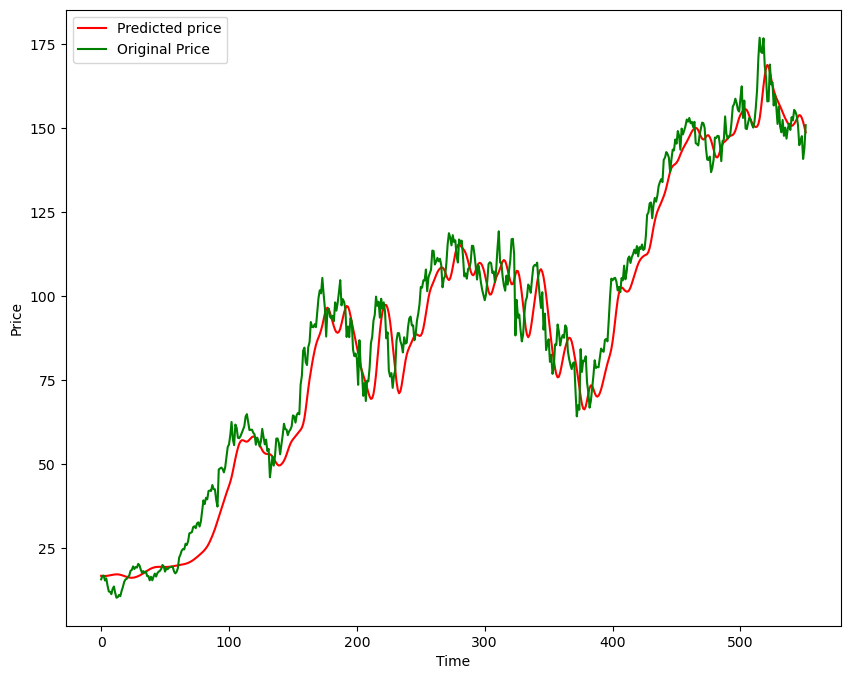

In [72]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = "Predicted price")
plt.plot(y, 'g', label = "Original Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [74]:
model.save('Stock Predictions Model.keras')